In [1]:
#install.packages("vcd")
library(DHARMa)
library(lindia)
library(tidyverse)
library(caret)
library(leaps)
library(MASS)
library(modEvA)
library(dplyr)
#random effect
library(lme4)

Warning message:
"package 'DHARMa' was built under R version 3.6.3"This is DHARMa 0.3.3.0. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa') Note: Syntax of plotResiduals has changed in 0.3.0, see ?plotResiduals for details
Warning message:
"package 'lindia' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.5     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning mess

In [2]:
R.version()

ERROR: Error in R.version(): impossible de trouver la fonction "R.version"


## Download data

In [52]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/chapter0_final_/Cleaning/Raw&Cleaned'
#jpeg(file.path(path_, 'diagnostic_plot_.jpg'))
#name = 'df4DifferenceModelling'
name = 'df4DifferenceModelling_4lowerDF'
#name = 'df4DifferenceModelling_mixedHenID'
sink(file.path(path_,paste(name,'.txt', sep='')))
df = read.csv(file.path(path_, paste(name,'.csv', sep='')), header = TRUE, sep = ";")
df$PenID = as.factor(df$PenID)
df$tracking_system = as.factor(df$tracking_system)
df$Trackingsystem_Zone = as.factor(df$Trackingsystem_Zone)
df$HenID = as.factor(df$HenID)
df$level = as.factor(df$level)
df$Total_number_transition = as.integer(df$Total_number_transition)
df$level_continuous = as.integer(df$level_continuous)
df$absolute_difference_log_1 = log(df$absolute_difference+1) #add one then take the log
df$absolute_difference_log_0 = log(df$absolute_difference+0.1) #add one then take the log
df$absolute_difference_sqrt = sqrt(df$absolute_difference)
print(dim(df))
summary(df)

[1] 10250    14


 absolute_difference     PenID                  tracking_system
 Min.   : 0.000      Pen 8  :1300   TrackingSystem 10-12:3825  
 1st Qu.: 0.000      Pen 9  :1300   TrackingSystem 3-5  :3825  
 Median : 0.000      Pen 10 :1275   TrackingSystem 8-9  :2600  
 Mean   : 2.611      Pen 11 :1275                              
 3rd Qu.: 3.000      Pen 12 :1275                              
 Max.   :67.000      Pen 3  :1275                              
                     (Other):2550                              
       Trackingsystem_Zone     HenID             level      level_continuous
 nbr_stays_1_Zone:2050     hen_113: 260   2020-11-26: 200   Min.   : 0.00   
 nbr_stays_2_Zone:2050     hen_158: 260   2020-11-27: 200   1st Qu.:12.00   
 nbr_stays_3_Zone:2050     hen_171: 260   2020-11-28: 200   Median :26.00   
 nbr_stays_4_Zone:2050     hen_181: 260   2020-11-29: 200   Mean   :26.23   
 nbr_stays_5_Zone:2050     hen_188: 260   2020-11-30: 200   3rd Qu.:40.00   
                          

In [53]:
df_z1 = df[df$Trackingsystem_Zone == 'nbr_stays_1_Zone', ] 

In [54]:
df_z2 = df[df$Trackingsystem_Zone == 'nbr_stays_2_Zone', ] 

In [55]:
df_z3 = df[df$Trackingsystem_Zone == 'nbr_stays_3_Zone', ] 

In [56]:
df_z4 = df[df$Trackingsystem_Zone == 'nbr_stays_4_Zone', ] 

In [57]:
df_z5 = df[df$Trackingsystem_Zone == 'nbr_stays_5_Zone', ] 

# Post-hoc analysis - differences between groups 

In [58]:
#Often called post-hoc comparisons or means comparisons, multiple comparisons is the analysis after ANOVA that helps us 
#quantify the differences between groups in order to determine which groups significantly differ from each other. 
aov.model = aov(absolute_difference_log_0 ~ PenID, data=df)
#plot(aov.model)
TukeyHSD(aov.model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = absolute_difference_log_0 ~ PenID, data = df)

$PenID
                     diff         lwr          upr     p adj
Pen 11-Pen 10 -0.64564211 -0.86744817 -0.423836045 0.0000000
Pen 12-Pen 10  0.38194705  0.16014099  0.603753111 0.0000050
Pen 3-Pen 10   0.37053891  0.14873285  0.592344975 0.0000115
Pen 4-Pen 10   0.93232934  0.71052328  1.154135403 0.0000000
Pen 5-Pen 10  -0.22718353 -0.44898959 -0.005377467 0.0401753
Pen 8-Pen 10   0.43919713  0.21846002  0.659934235 0.0000000
Pen 9-Pen 10   0.07869325 -0.14204386  0.299430355 0.9609166
Pen 12-Pen 11  1.02758916  0.80578310  1.249395216 0.0000000
Pen 3-Pen 11   1.01618102  0.79437496  1.237987080 0.0000000
Pen 4-Pen 11   1.57797145  1.35616539  1.799777509 0.0000000
Pen 5-Pen 11   0.41845858  0.19665252  0.640264639 0.0000003
Pen 8-Pen 11   1.08483923  0.86410212  1.305576341 0.0000000
Pen 9-Pen 11   0.72433535  0.50359824  0.945072461 0.00000

In [59]:
#Often called post-hoc comparisons or means comparisons, multiple comparisons is the analysis after ANOVA that helps us 
#quantify the differences between groups in order to determine which groups significantly differ from each other. 
aov.model = aov(absolute_difference_log_0 ~ Trackingsystem_Zone, data=df)
#plot(aov.model)
TukeyHSD(aov.model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = absolute_difference_log_0 ~ Trackingsystem_Zone, data = df)

$Trackingsystem_Zone
                                         diff         lwr        upr     p adj
nbr_stays_2_Zone-nbr_stays_1_Zone  2.08654683  1.94814482  2.2249488 0.0000000
nbr_stays_3_Zone-nbr_stays_1_Zone  2.11463786  1.97623586  2.2530399 0.0000000
nbr_stays_4_Zone-nbr_stays_1_Zone  0.04008933 -0.09831268  0.1784913 0.9335273
nbr_stays_5_Zone-nbr_stays_1_Zone  0.24348650  0.10508449  0.3818885 0.0000159
nbr_stays_3_Zone-nbr_stays_2_Zone  0.02809104 -0.11031097  0.1664930 0.9815054
nbr_stays_4_Zone-nbr_stays_2_Zone -2.04645750 -2.18485950 -1.9080555 0.0000000
nbr_stays_5_Zone-nbr_stays_2_Zone -1.84306033 -1.98146234 -1.7046583 0.0000000
nbr_stays_4_Zone-nbr_stays_3_Zone -2.07454853 -2.21295054 -1.9361465 0.0000000
nbr_stays_5_Zone-nbr_stays_3_Zone -1.87115137 -2.00955337 -1.7327494 0.0000000
nbr_stays_5_Zone-nbr_stays_4_Zone

# Anova per zone


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0132 -0.4091 -0.1411  0.0000  3.3350 

Coefficients: (7 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.16153    0.14059 -15.374  < 2e-16 ***
PenIDPen 11   0.26808    0.19883   1.348 0.177715    
PenIDPen 12   0.69034    0.19883   3.472 0.000528 ***
PenIDPen 3    0.82960    0.19883   4.172 3.14e-05 ***
PenIDPen 4    0.36212    0.19883   1.821 0.068719 .  
PenIDPen 5   -0.14105    0.19883  -0.709 0.478151    
PenIDPen 8    1.78447    0.19787   9.018  < 2e-16 ***
PenIDPen 9    3.87217    0.19787  19.569  < 2e-16 ***
HenIDhen_118  0.26045    0.19883   1.310 0.190383    
HenIDhen_12   0.38882    0.19883   1.956 0.050658 .  
HenIDhen_137 -0.54928    0.19883  -2.763 0.005787 ** 
HenIDhen_138  0.25540    0.19883   1.285 0.199105    
HenIDhen_141 -0.04702    0.19883  -0.236 0.813091    
HenIDhen_144 -0.4

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.019229"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00037896"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  2.1876e-015"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1.4361e-007"

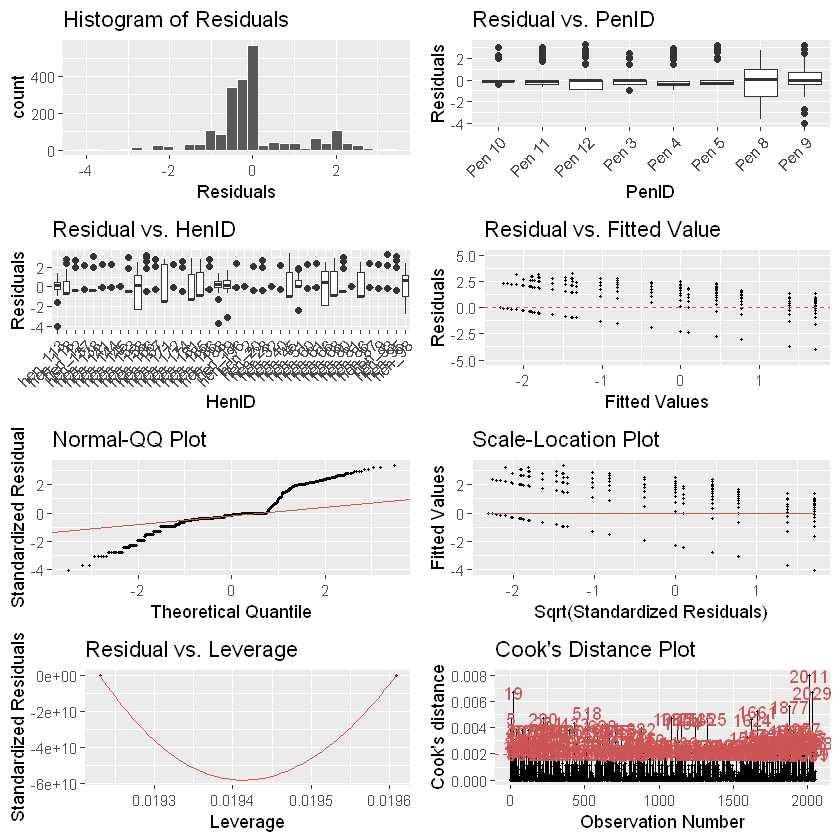

In [60]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z1)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1897 -0.7128  0.1012  0.7546  3.2994 

Coefficients: (7 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.20553    0.16533   7.292 4.38e-13 ***
PenIDPen 11  -2.67717    0.23381 -11.450  < 2e-16 ***
PenIDPen 12   0.93875    0.23381   4.015 6.16e-05 ***
PenIDPen 3    1.03755    0.23381   4.438 9.59e-06 ***
PenIDPen 4    0.47038    0.23381   2.012 0.044368 *  
PenIDPen 5   -2.96557    0.23381 -12.684  < 2e-16 ***
PenIDPen 8   -1.13700    0.23268  -4.887 1.11e-06 ***
PenIDPen 9    0.62199    0.23268   2.673 0.007575 ** 
HenIDhen_118  1.13649    0.23381   4.861 1.26e-06 ***
HenIDhen_12   0.40150    0.23381   1.717 0.086091 .  
HenIDhen_137 -0.43715    0.23381  -1.870 0.061668 .  
HenIDhen_138  0.91829    0.23381   3.928 8.87e-05 ***
HenIDhen_141  0.04307    0.23381   0.184 0.853877    
HenIDhen_144 -1.1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.019229"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00037896"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  2.0342e-015"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1.4361e-007"

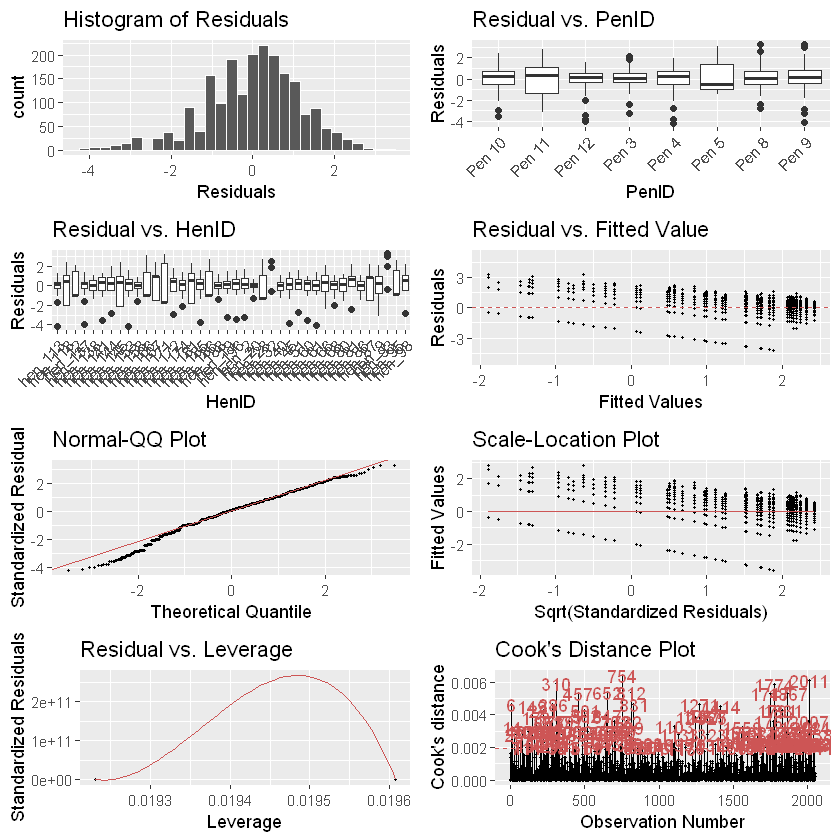

In [61]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z2)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z3)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4007 -0.6619  0.0539  0.6744  4.1955 

Coefficients: (7 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.34682    0.16239   8.294  < 2e-16 ***
PenIDPen 11  -2.88535    0.22966 -12.564  < 2e-16 ***
PenIDPen 12   0.70130    0.22966   3.054 0.002290 ** 
PenIDPen 3    1.02848    0.22966   4.478 7.95e-06 ***
PenIDPen 4    0.61964    0.22966   2.698 0.007032 ** 
PenIDPen 5   -0.78500    0.22966  -3.418 0.000643 ***
PenIDPen 8   -2.82455    0.22855 -12.358  < 2e-16 ***
PenIDPen 9   -0.72678    0.22855  -3.180 0.001495 ** 
HenIDhen_118  1.06297    0.22966   4.629 3.92e-06 ***
HenIDhen_12   1.36027    0.22966   5.923 3.71e-09 ***
HenIDhen_137 -0.25255    0.22966  -1.100 0.271595    
HenIDhen_138  0.82873    0.22966   3.609 0.000315 ***
HenIDhen_141  0.04252    0.22966   0.185 0.853144    
HenIDhen_144 -0.3

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.019229"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00037896"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.9503e-015"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1.4361e-007"

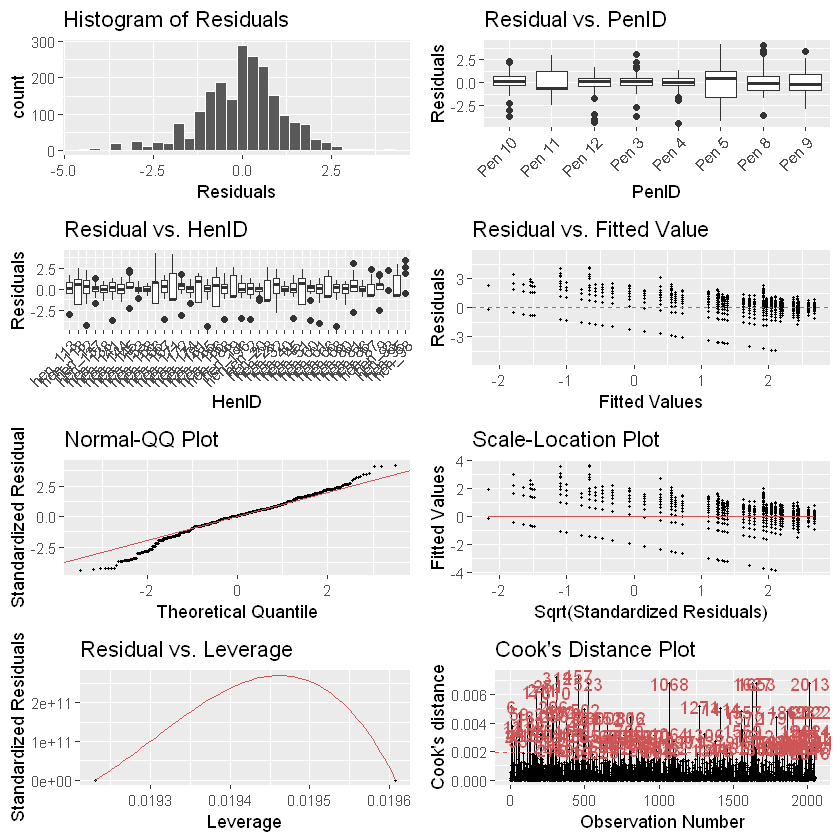

In [62]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z3)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z4)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7835 -0.3888 -0.0940  0.0843  3.4378 

Coefficients: (7 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.632e+00  1.405e-01 -11.615  < 2e-16 ***
PenIDPen 11  -6.709e-01  1.987e-01  -3.377 0.000746 ***
PenIDPen 12  -3.291e-01  1.987e-01  -1.657 0.097745 .  
PenIDPen 3    1.641e+00  1.987e-01   8.259 2.64e-16 ***
PenIDPen 4    1.634e+00  1.987e-01   8.224 3.50e-16 ***
PenIDPen 5   -5.769e-01  1.987e-01  -2.904 0.003727 ** 
PenIDPen 8   -5.201e-01  1.977e-01  -2.631 0.008582 ** 
PenIDPen 9    1.966e+00  1.977e-01   9.945  < 2e-16 ***
HenIDhen_118  4.702e-02  1.987e-01   0.237 0.812941    
HenIDhen_12   9.404e-02  1.987e-01   0.473 0.636029    
HenIDhen_137  1.957e-01  1.987e-01   0.985 0.324694    
HenIDhen_138 -2.821e-01  1.987e-01  -1.420 0.155766    
HenIDhen_141 -3.418e-01  1.987e-01  -1.720 0.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.019229"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00037896"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  2.1876e-015"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1.4361e-007"

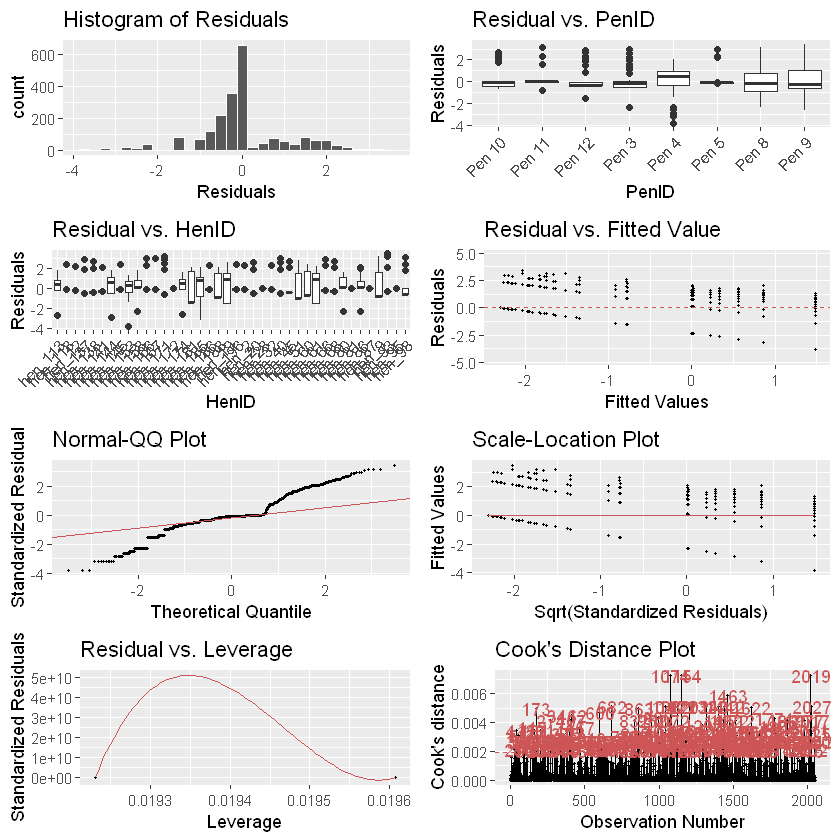

In [63]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z4)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z5)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0427 -0.6612 -0.2891  0.8504  4.7821 

Coefficients: (7 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.90109    0.17614 -10.793  < 2e-16 ***
PenIDPen 11  -0.05970    0.24910  -0.240  0.81063    
PenIDPen 12   0.19555    0.24910   0.785  0.43253    
PenIDPen 3    0.09404    0.24910   0.378  0.70584    
PenIDPen 4   -0.30746    0.24910  -1.234  0.21724    
PenIDPen 5    2.35697    0.24910   9.462  < 2e-16 ***
PenIDPen 8   -0.11238    0.24790  -0.453  0.65035    
PenIDPen 9    0.59851    0.24790   2.414  0.01585 *  
HenIDhen_118  0.09404    0.24910   0.378  0.70584    
HenIDhen_12   1.28421    0.24910   5.155 2.78e-07 ***
HenIDhen_137 -0.29463    0.24910  -1.183  0.23704    
HenIDhen_138  1.55998    0.24910   6.262 4.62e-10 ***
HenIDhen_141  0.08136    0.24910   0.327  0.74400    
HenIDhen_144  0.0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.019229"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00037896"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  2.1761e-015"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1.4361e-007"

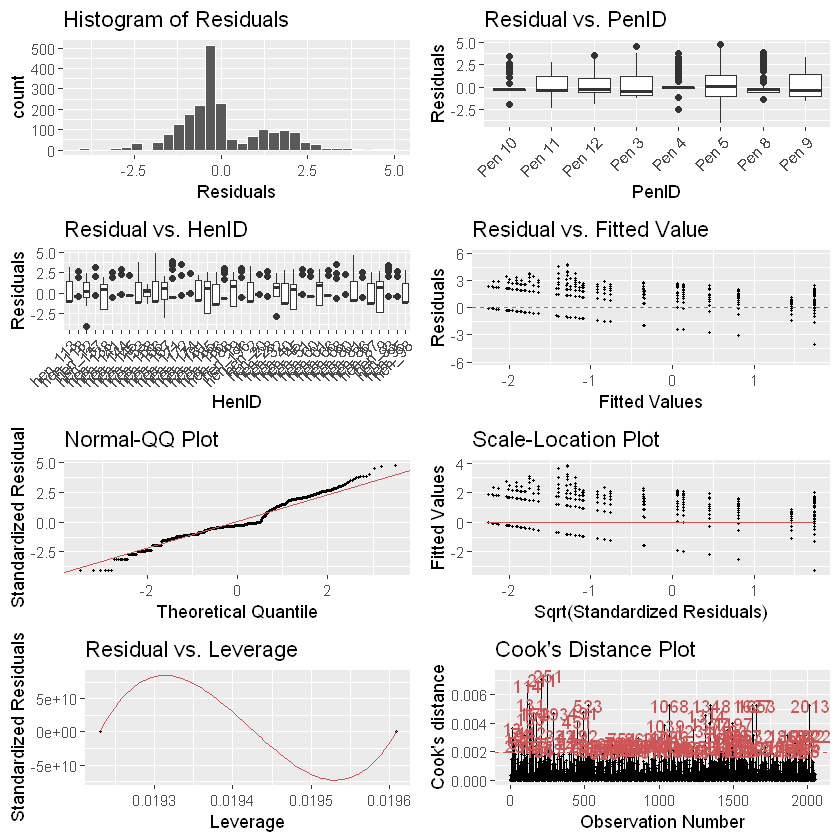

In [64]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z5)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)

# Model

In [65]:
model = lm(absolute_difference_log_0~PenID*Trackingsystem_Zone+HenID+level_continuous+temperature_C+humidity_avgpercent+Total_number_transition,data=df)
capture.output(summary(model), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
print(summary(model))
capture.output(anova(model), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
an = anova(model)
afss =an$"Sum Sq"
cbind(an,PctExp=afss/sum(afss)*100)


Call:
lm(formula = absolute_difference_log_0 ~ PenID * Trackingsystem_Zone + 
    HenID + level_continuous + temperature_C + humidity_avgpercent + 
    Total_number_transition, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8522 -0.7595 -0.0496  0.7531  5.4362 

Coefficients: (7 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                     -2.578e+00  1.770e-01 -14.563
PenIDPen 11                                     -3.734e-01  1.441e-01  -2.591
PenIDPen 12                                      3.393e-01  1.441e-01   2.355
PenIDPen 3                                       7.351e-01  1.441e-01   5.101
PenIDPen 4                                      -3.538e-02  1.441e-01  -0.246
PenIDPen 5                                      -4.674e-02  1.441e-01  -0.324
PenIDPen 8                                       1.217e+00  1.434e-01   8.484
PenIDPen 9                           

,Df,Sum Sq,Mean Sq,F value,Pr(>F),PctExp
PenID,7,2.040651e+03,2.915215e+02,1.982086e+02,1.022115e-276,5.516102e+00
Trackingsystem_Zone,4,9.970479e+03,2.492620e+03,1.694758e+03,0.000000e+00,2.695129e+01
HenID,32,3.546456e+03,1.108267e+02,7.535226e+01,0.000000e+00,9.586457e+00
level_continuous,1,2.050314e-02,2.050314e-02,1.394030e-02,9.060153e-01,5.542224e-05
temperature_C,1,2.385684e-03,2.385684e-03,1.622051e-03,9.678749e-01,6.448764e-06
humidity_avgpercent,1,2.005390e+00,2.005390e+00,1.363486e+00,2.429616e-01,5.420790e-03
Total_number_transition,1,7.600694e+01,7.600694e+01,5.167792e+01,6.998961e-13,2.054551e-01
PenID:Trackingsystem_Zone,28,6.395079e+03,2.283957e+02,1.552886e+02,0.000000e+00,1.728660e+01
Residuals,10174,1.496373e+04,1.470782e+00,NA,NA,4.044861e+01


# Diagnostic plot

In [66]:
#save
jpeg(file.path(path_, paste(name,'diagnostic_plot_final_model.jpg', sep='_')))
lindia::gg_diagnose(model)
dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


png 
  2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


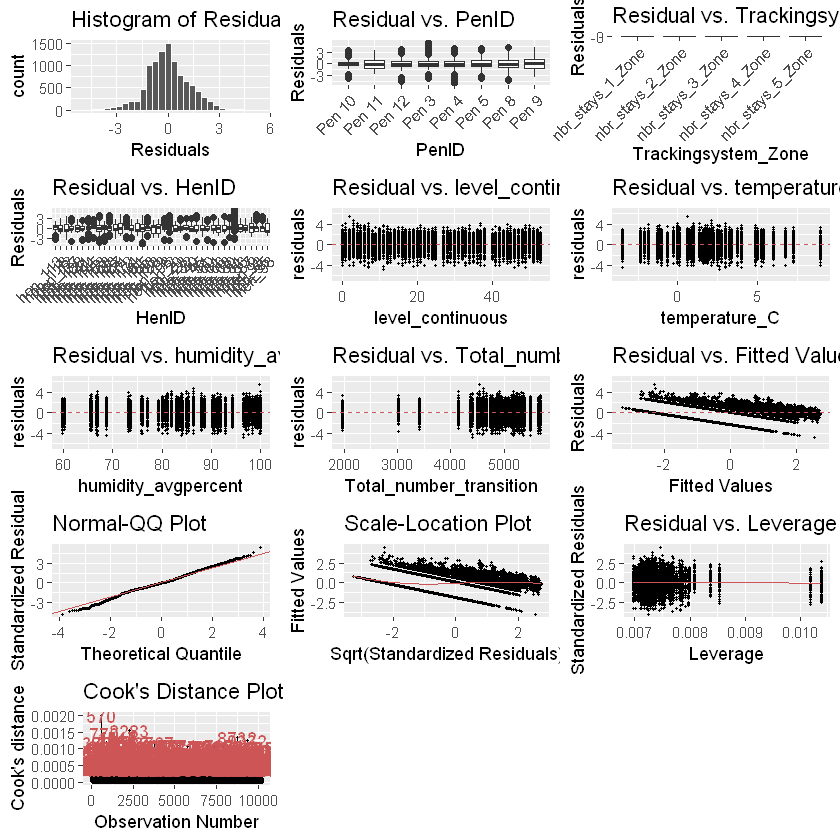

In [67]:
lindia::gg_diagnose(model)

In [68]:
mean(residuals(model)) 

[1] -2.32993e-17

In [69]:
median(residuals(model))

[1] -0.04963499

In [ ]:
#TO READ: https://www.datanovia.com/en/lessons/ancova-in-r/#check-assumptions-1